## Projeto 4- traveling salesman em MPI - Paulo Tozzo

## O Problema

O problema do caixeiro-viajante é um problema comum na área de logísticas, ele é basicamente: dado n pontos qual é o menor caminho que percorra todos esses pontos?. Esse problema é classificado como NP-completo, sua solução ótima é custosa em relação ao tempo,já que ela é exponencial, assim a paralelização do código usando MPI fornece respostas mais rápidas se comparadas com uma solução sequencial e ela é facilmente escalável, quantos mais computadores o cluster tiver mais rápido a solução será descoberta. Existem outras soluções que não retornam caminhos ótimos, e sim bons, porém são mais rápidas, uma delas foi paralelizado e será apresentada.

In [1]:
import subprocess
from subprocess import PIPE
import numpy as np
import matplotlib.pyplot as plt

## Organização do codigo

A solução ótima do traveling salmen é simples, ela simplesmente testar todas as possibilidades de caminho e acha a melhor delas, o codigo “tsp.cc” faz axatamente isso, usando recursão para seguir todos os pontos até não existirem mais nenhum, a versão em paralelo simplesmente divide cada primeiro fork criado pela quantidade de computadores disponível na rede. Já o 2-opt criam caminhos randomicamente em paralelo, e depois mudam a sequência dos pontos até não ter melhora no custo total.

## Descrição dos testes
Foi realizado 4 testes de desempenho, comparado a solução exaustiva paralela com a sequencial e com o 2-opt em paralelo. Para os testes menores foi usado um cluster da amazon ec2, esse contem 3 maquinas t3.micro. Os últimos testes foram feitos na máquina local usando 3 processos.


## teste 1
teste simples que em que os três pontos formam um triângulo retângulo.


In [2]:
with open('teste1.txt', 'r') as file:
    data = file.read().replace('\n', ' ')
    data = str.encode(data)

time_main = [];
time_para = [];

for i in range(10):
    main = subprocess.run(["build/tsp"],input = data,stderr=PIPE)
    main_para = subprocess.run(["build/2_opt_mpi"],input = data,stderr=PIPE)

    time_main.append(float((main.stderr).decode("utf-8")))
    time_para.append(float((main_para.stderr).decode("utf-8")))

In [3]:
time_main = [3.6947e-05,0.000106533,3.5625e-05,4.1122e-05,3.8161e-05]
time_para = [2.7822e-05,2.552e-05,2.5527e-05,2.7746e-05,2.6293e-05]
time_opt = [0.00977739,0.00838665,0.00852363,0.00777633,0.00858342]

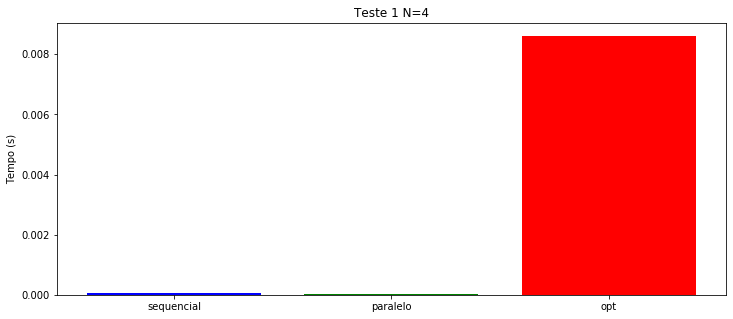

In [4]:
x = np.arange(3)
mean_list = [np.mean(time_main),np.mean(time_para),np.mean(time_opt)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green","red"])
plt.xticks(x, ["sequencial","paralelo","opt"])
plt.ylabel("Tempo (s)")
plt.title("Teste 1 N=4")
plt.show()

## teste 2
teste mais complexo que contem 10 pontos aleatoriamente gerados usando o programa "gerador.py". 

In [5]:
time_main = [1.65079,1.70293,1.70114]
time_para = [0.999635,1.13943,1.12154]
time_opt = [0.222419,0.150827,0.229382]

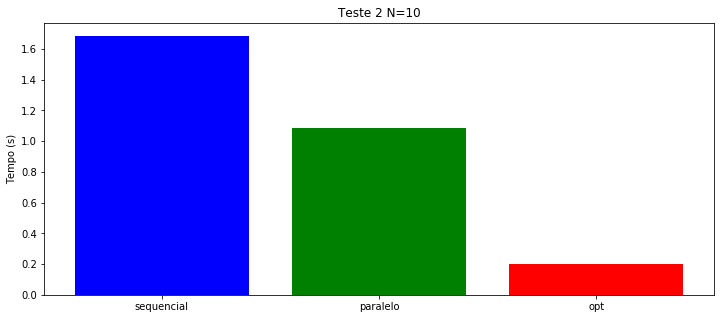

In [6]:
x = np.arange(3)
mean_list = [np.mean(time_main),np.mean(time_para),np.mean(time_opt)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green","red"])
plt.xticks(x, ["sequencial","paralelo","opt"])
plt.ylabel("Tempo (s)")
plt.title("Teste 2 N=10")
plt.show()

## teste 3
teste que contem 15 pontos aleatoriamente gerados usando o programa "gerador.py". Esse teste usou o computador local.

In [7]:
time_opt = [0.227255,0.258407,0.231399]
time_opt_seq = [0.219567,0.21525,0.214865]

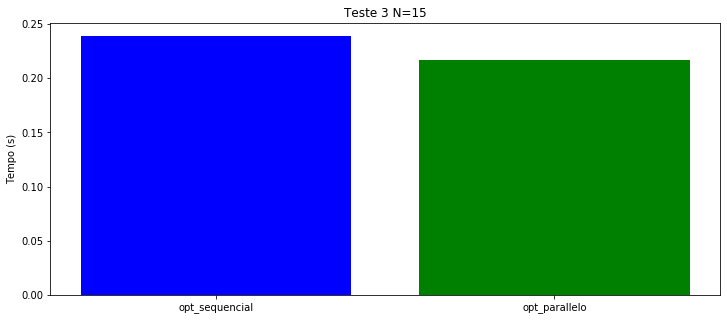

In [8]:
x = np.arange(2)
mean_list = [np.mean(time_opt),np.mean(time_opt_seq)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green"])
plt.xticks(x, ["opt_sequencial","opt_parallelo"])
plt.ylabel("Tempo (s)")
plt.title("Teste 3 N=15")
plt.show()

Apesar do código em série ser mais rápido ele gera respostas piores, o código em paralelo gerou como melhor solução 26052.5 e a em série 28051.9.

## teste 4
teste que contem 50 pontos aleatoriamente gerados usando o programa "gerador.py". Esse teste usou o computador local.

In [9]:
time_opt = [11.3991,11.1432,12.4603]
time_opt_seq = [10.9021,10.4327,10.4638]

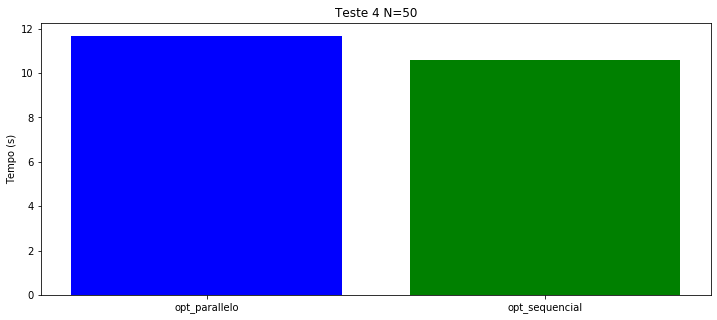

In [10]:
x = np.arange(2)
mean_list = [np.mean(time_opt),np.mean(time_opt_seq)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green"])
plt.xticks(x, ["opt_parallelo","opt_sequencial"])
plt.ylabel("Tempo (s)")
plt.title("Teste 4 N=50")
plt.show()

AS respostas melhores são mais expressivas quando o n é maior, nesse caso o código em paralelo gerou 60833 enquanto o em série gerou 68019,9.